# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [15]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [16]:
data = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

In [17]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,1.348750,0.738909,0.750402,0.265600,0.677609,0.697340,0.544702,0.563198,0.286151,0.278589,...,-0.017324,-0.013475,-0.002160,-0.019984,-0.006024,-0.000448,0.004822,-0.35,0.7,-0.8
1,1.345034,0.740369,0.750415,0.264495,0.677469,0.697147,0.544562,0.563022,0.286151,0.278487,...,0.020299,0.016000,0.002560,0.023046,0.007717,0.000901,-0.001783,-0.35,0.7,-0.8
2,1.344109,0.730372,0.742537,0.264412,0.674987,0.694076,0.542267,0.560206,0.286151,0.278595,...,-0.007533,-0.034964,0.000536,-0.011002,-0.002570,-0.000886,0.001168,-0.35,0.7,-0.8
3,1.335018,0.721172,0.737871,0.263852,0.669177,0.692409,0.536892,0.558678,0.286151,0.278618,...,-0.001524,0.048316,-0.002919,0.002287,-0.004572,0.000952,-0.001264,-0.35,0.7,-0.8
4,1.331312,0.712287,0.733699,0.262880,0.666783,0.690709,0.534665,0.557117,0.286151,0.278679,...,-0.006020,-0.050916,0.001676,-0.009596,0.003233,-0.001222,0.006062,-0.35,0.7,-0.8


## Feature Selection

In [18]:
data = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

In [19]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,1.348750,0.738909,0.750402,0.265600,0.677609,0.697340,0.544702,0.563198,0.286151,0.278589,...,0.002626,-0.008249,0.001961,-0.017324,-0.013475,-0.002160,-0.019984,-0.006024,-0.000448,0.004822
1,1.345034,0.740369,0.750415,0.264495,0.677469,0.697147,0.544562,0.563022,0.286151,0.278487,...,-0.004270,0.015992,-0.002183,0.020299,0.016000,0.002560,0.023046,0.007717,0.000901,-0.001783
2,1.344109,0.730372,0.742537,0.264412,0.674987,0.694076,0.542267,0.560206,0.286151,0.278595,...,0.007482,-0.014805,0.001179,-0.007533,-0.034964,0.000536,-0.011002,-0.002570,-0.000886,0.001168
3,1.335018,0.721172,0.737871,0.263852,0.669177,0.692409,0.536892,0.558678,0.286151,0.278618,...,-0.009382,0.013004,-0.000077,-0.001524,0.048316,-0.002919,0.002287,-0.004572,0.000952,-0.001264
4,1.331312,0.712287,0.733699,0.262880,0.666783,0.690709,0.534665,0.557117,0.286151,0.278679,...,0.015205,-0.015014,0.000204,-0.006020,-0.050916,0.001676,-0.009596,0.003233,-0.001222,0.006062


### Variance Analysis

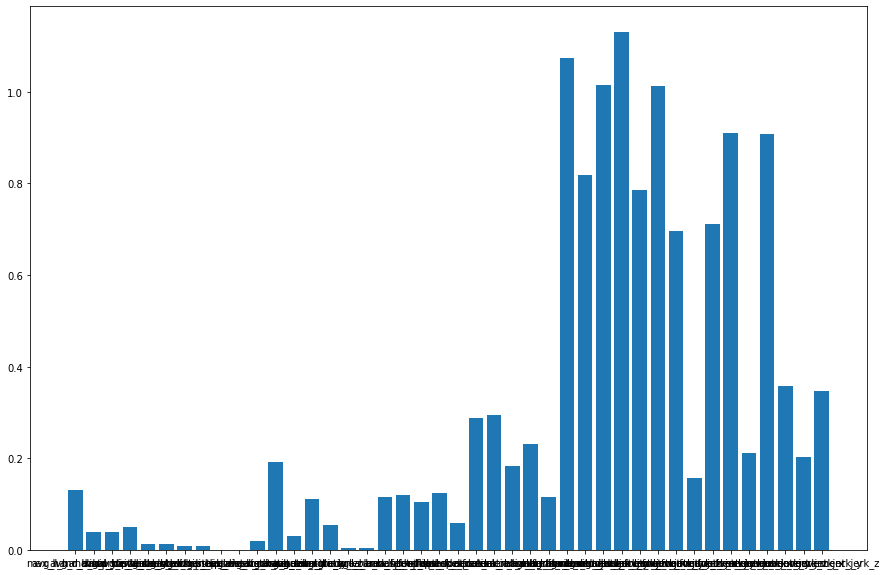

max_hand_distance  -  0.13121304900105157
avg_l_hand_hip_distance  -  0.03998388047173072
avg_r_hand_hip_distance  -  0.03876697049698152
max_stride_length  -  0.048873529760230155
avg_l_hand_chest_distance  -  0.012488436059521622
avg_r_hand_chest_distance  -  0.012565952451048188
avg_l_elbow_hip_distance  -  0.008536372414148305
avg_r_elbow_hip_distance  -  0.008089955906481702
avg_chest_pelvis_distance  -  7.095027217112527e-19
avg_neck_chest_distance  -  1.949490877799661e-05
avg_neck_rotation_w  -  0.019558466815596077
avg_neck_rotation_x  -  0.19229424325395594
avg_neck_rotation_y  -  0.030248970805838674
avg_neck_rotation_z  -  0.11145761101864475
avg_total_body_volume  -  0.053872227745665954
avg_triangle_area_hands_neck  -  0.00309647663260713
avg_triangle_area_feet_hips  -  0.003439463459694147
l_hand_speed  -  0.1164755731313164
r_hand_speed  -  0.12076444677139297
l_foot_speed  -  0.10383448447215032
r_foot_speed  -  0.12316220705892268
neck_speed  -  0.059580161892185346
l

In [20]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [21]:
data = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

In [22]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_hand_movement_jerk_z,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z
0,1.348750,0.738909,0.750402,0.265600,0.677609,0.697340,0.544702,0.563198,0.286151,0.278589,...,0.002626,-0.008249,0.001961,-0.017324,-0.013475,-0.002160,-0.019984,-0.006024,-0.000448,0.004822
1,1.345034,0.740369,0.750415,0.264495,0.677469,0.697147,0.544562,0.563022,0.286151,0.278487,...,-0.004270,0.015992,-0.002183,0.020299,0.016000,0.002560,0.023046,0.007717,0.000901,-0.001783
2,1.344109,0.730372,0.742537,0.264412,0.674987,0.694076,0.542267,0.560206,0.286151,0.278595,...,0.007482,-0.014805,0.001179,-0.007533,-0.034964,0.000536,-0.011002,-0.002570,-0.000886,0.001168
3,1.335018,0.721172,0.737871,0.263852,0.669177,0.692409,0.536892,0.558678,0.286151,0.278618,...,-0.009382,0.013004,-0.000077,-0.001524,0.048316,-0.002919,0.002287,-0.004572,0.000952,-0.001264
4,1.331312,0.712287,0.733699,0.262880,0.666783,0.690709,0.534665,0.557117,0.286151,0.278679,...,0.015205,-0.015014,0.000204,-0.006020,-0.050916,0.001676,-0.009596,0.003233,-0.001222,0.006062


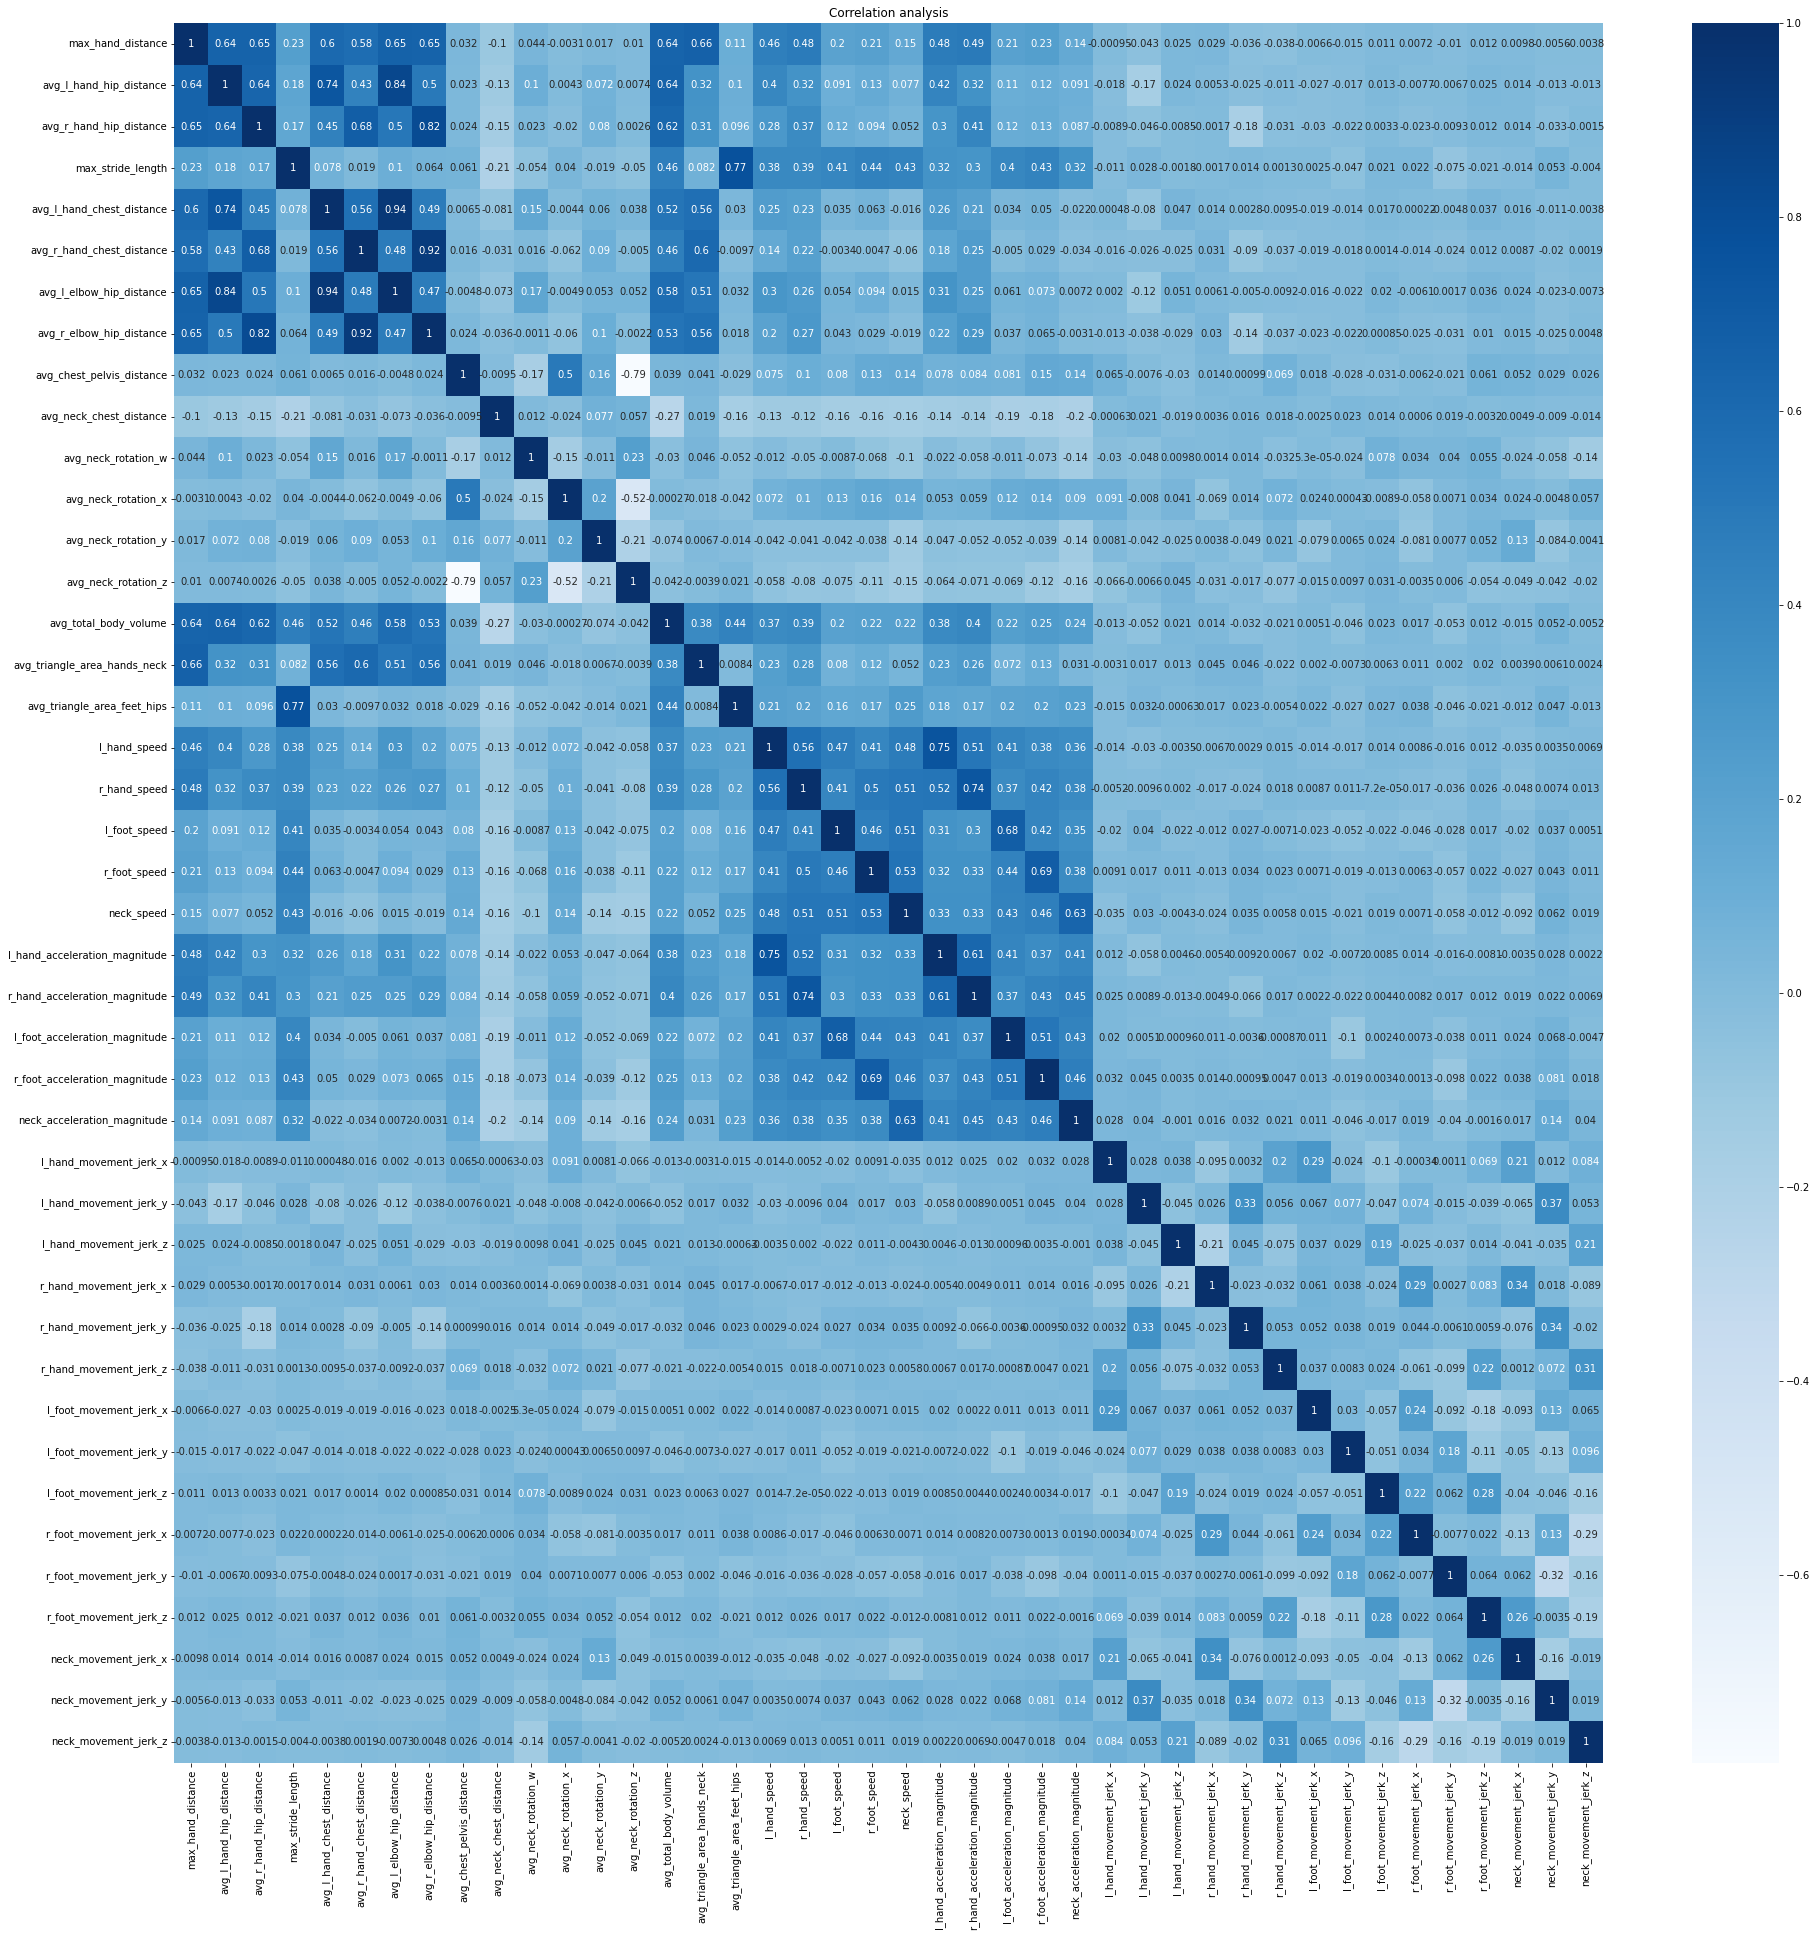

In [23]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [24]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [25]:
df = pd.read_csv('datasets/DANCE_WALK_0.5sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.392512
avg_l_hand_hip_distance          0.336852
avg_r_hand_hip_distance          0.304586
max_stride_length                0.123823
avg_l_hand_chest_distance        0.293713
avg_r_hand_chest_distance        0.260455
avg_l_elbow_hip_distance         0.308100
avg_r_elbow_hip_distance         0.274059
avg_chest_pelvis_distance        0.019646
avg_neck_chest_distance          0.005678
avg_neck_rotation_w              0.069818
avg_neck_rotation_x              0.065212
avg_neck_rotation_y              0.049147
avg_neck_rotation_z              0.000205
avg_total_body_volume            0.250323
avg_triangle_area_hands_neck     0.254694
avg_triangle_area_feet_hips      0.042730
l_hand_speed                     0.258962
r_hand_speed                     0.233349
l_foot_speed                     0.077799
r_foot_speed                     0.082799
neck_speed                       0.020235
l_hand_acceleration_ma

In [26]:
X = X.drop(columns=[
    "l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
    "r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
    "l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
    "r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
    "neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
])

In [27]:
#Store

fullData = X.join(y, how='right')
fullData.to_csv(r'datasets/Fs_DANCE_WALK_0.5sec.csv', index = False)

In [29]:
data = pd.read_csv('datasets/Fs_DANCE_WALK_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,1.348750,0.738909,0.750402,0.265600,0.677609,0.697340,0.544702,0.563198,0.286151,0.278589,...,0.006604,0.001539,0.008574,0.008052,0.014557,0.014555,0.005056,-0.35,0.7,-0.8
1,1.345034,0.740369,0.750415,0.264495,0.677469,0.697147,0.544562,0.563022,0.286151,0.278487,...,0.011038,0.002920,0.012077,0.007623,0.011388,0.014018,0.002928,-0.35,0.7,-0.8
2,1.344109,0.730372,0.742537,0.264412,0.674987,0.694076,0.542267,0.560206,0.286151,0.278595,...,0.014960,0.002775,0.012838,0.012324,0.007584,0.025225,0.000780,-0.35,0.7,-0.8
3,1.335018,0.721172,0.737871,0.263852,0.669177,0.692409,0.536892,0.558678,0.286151,0.278618,...,0.009247,0.002682,0.022236,0.012461,0.005526,0.023234,0.004394,-0.35,0.7,-0.8
4,1.331312,0.712287,0.733699,0.262880,0.666783,0.690709,0.534665,0.557117,0.286151,0.278679,...,0.019839,0.004593,0.015039,0.019778,0.011462,0.028986,0.005576,-0.35,0.7,-0.8


## Data Balancing

In [37]:
data = pd.read_csv('datasets/labels/DANCE_WALK_0.5sec.csv')
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_x,l_foot_movement_jerk_y,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION
0,1.348750,0.738909,0.750402,0.265600,0.677609,0.697340,0.544702,0.563198,0.286151,0.278589,...,-0.008249,0.001961,-0.017324,-0.013475,-0.002160,-0.019984,-0.006024,-0.000448,0.004822,afraid
1,1.345034,0.740369,0.750415,0.264495,0.677469,0.697147,0.544562,0.563022,0.286151,0.278487,...,0.015992,-0.002183,0.020299,0.016000,0.002560,0.023046,0.007717,0.000901,-0.001783,afraid
2,1.344109,0.730372,0.742537,0.264412,0.674987,0.694076,0.542267,0.560206,0.286151,0.278595,...,-0.014805,0.001179,-0.007533,-0.034964,0.000536,-0.011002,-0.002570,-0.000886,0.001168,afraid
3,1.335018,0.721172,0.737871,0.263852,0.669177,0.692409,0.536892,0.558678,0.286151,0.278618,...,0.013004,-0.000077,-0.001524,0.048316,-0.002919,0.002287,-0.004572,0.000952,-0.001264,afraid
4,1.331312,0.712287,0.733699,0.262880,0.666783,0.690709,0.534665,0.557117,0.286151,0.278679,...,-0.015014,0.000204,-0.006020,-0.050916,0.001676,-0.009596,0.003233,-0.001222,0.006062,afraid


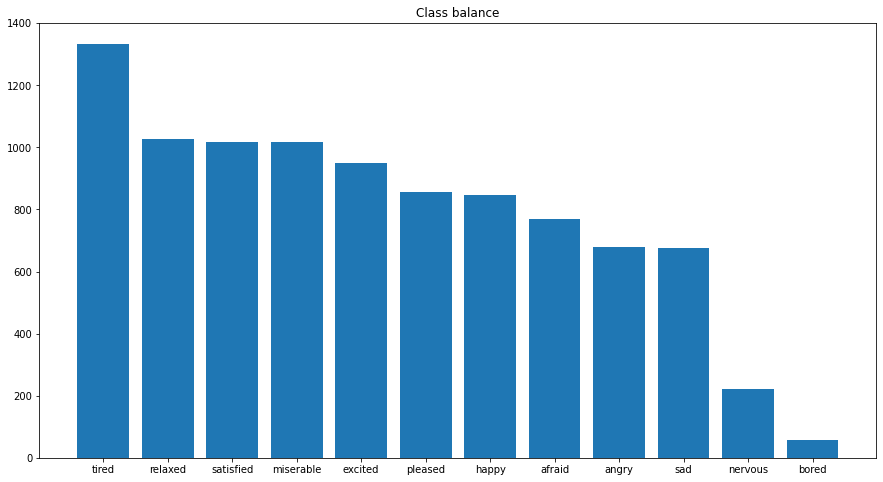

Minority class: 56
Majority class: 1018
Proportion: 0.06 : 1.0


In [38]:
target_count = data['EMOTION'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

Class=afraid, n=770 (8.152%)
Class=excited, n=948 (10.036%)
Class=angry, n=678 (7.178%)
Class=tired, n=1334 (14.122%)
Class=pleased, n=856 (9.062%)
Class=satisfied, n=1018 (10.777%)
Class=bored, n=56 (0.593%)
Class=relaxed, n=1026 (10.862%)
Class=miserable, n=1018 (10.777%)
Class=sad, n=676 (7.156%)
Class=happy, n=846 (8.956%)
Class=nervous, n=220 (2.329%)


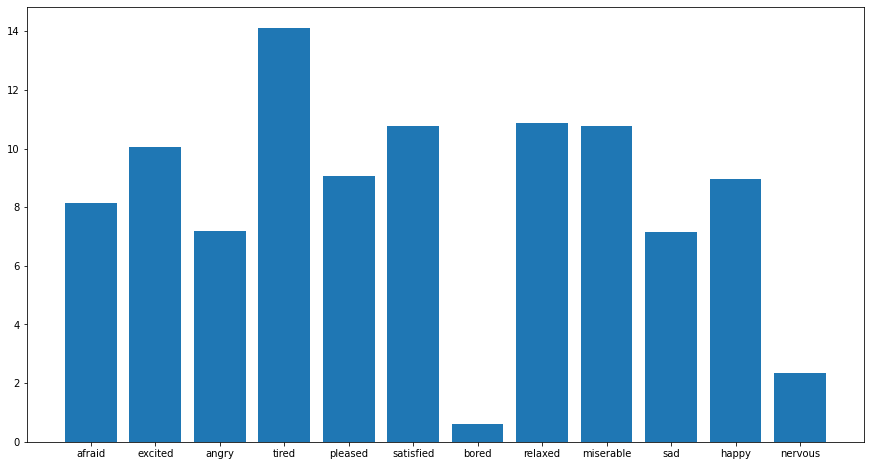

In [39]:
data = pd.read_csv('datasets/labels/DANCE_WALK_0.5sec.csv')


values = data.values
# split into input and output elements
X, y = values[:, :-1], values[:, -1]

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), perc)
plt.show()

### Undersample

Class=afraid, n=1000 (8.188%)
Class=angry, n=1000 (8.188%)
Class=bored, n=28 (0.229%)
Class=disgusted, n=1000 (8.188%)
Class=excited, n=474 (3.881%)
Class=happy, n=1000 (8.188%)
Class=miserable, n=509 (4.168%)
Class=nervous, n=110 (0.901%)
Class=pleased, n=428 (3.504%)
Class=relaxed, n=513 (4.200%)
Class=sad, n=1000 (8.188%)
Class=satisfied, n=509 (4.168%)
Class=tired, n=667 (5.461%)


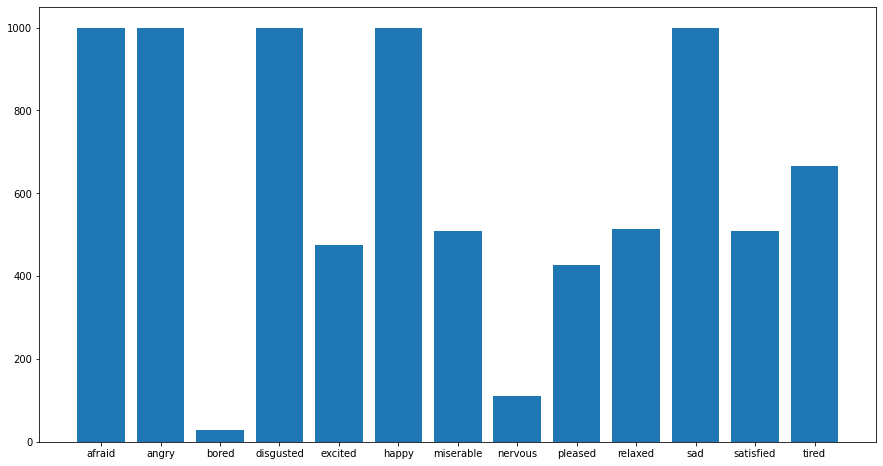

In [128]:
#strategy = {"angry":339, "happy": 400, "sad": 338, "afraid": 385, "pleased": 400, "bored": 28, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 110}
strategy = {"angry":1000,"disgusted":1000, "happy": 1000, "sad": 1000, "afraid": 1000, "pleased": 428, "bored": 28, "tired": 667, "relaxed": 513, "excited": 474, "miserable": 509, "satisfied": 509, "nervous": 110}


nm = NearMiss(sampling_strategy=strategy)
X_res, y_res = nm.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
    
# plot the distribution
plt.figure(figsize=(15,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### SMOTE

Class=afraid, n=600 (7.692%)
Class=angry, n=600 (7.692%)
Class=bored, n=600 (7.692%)
Class=disgusted, n=600 (7.692%)
Class=excited, n=600 (7.692%)
Class=happy, n=600 (7.692%)
Class=miserable, n=600 (7.692%)
Class=nervous, n=600 (7.692%)
Class=pleased, n=600 (7.692%)
Class=relaxed, n=600 (7.692%)
Class=sad, n=600 (7.692%)
Class=satisfied, n=600 (7.692%)
Class=tired, n=600 (7.692%)


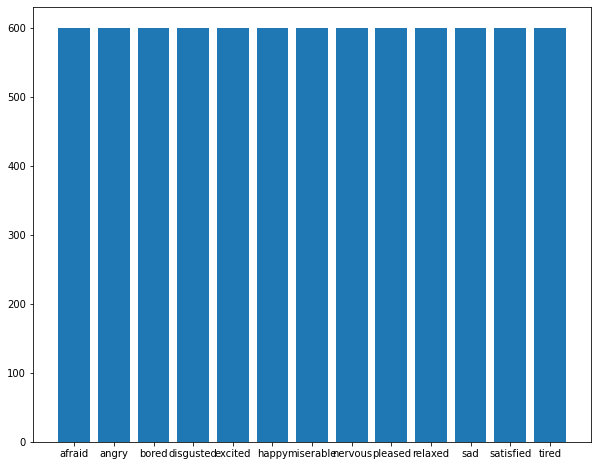

In [111]:
#strategy = {"angry":400, "happy": 400, "sad": 400, "afraid": 400, "pleased": 400, "bored": 400, "tired": 400, "relaxed": 400, "excited": 400, "miserable": 400, "satisfied": 400, "nervous": 400}
strategy = {"angry":600, "happy": 600, "sad": 600, "afraid": 600, "pleased": 600, "bored": 600, "tired": 600, "relaxed": 600, "excited": 600, "miserable": 600, "satisfied": 600, "nervous": 600, "disgusted": 600}


# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_res, y_res)

# summarize distribution
counter = Counter(y)
perc = []
for k,v in counter.items():
    per = v / len(y) * 100
    perc.append(per)
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(10,8))
plt.bar(counter.keys(), counter.values())
plt.show()

### Store data

In [40]:
conv_dict = {
    "angry": (-0.5, 0.6, 0.9),
    "happy": (0.6, 0.5, 0.2),
    "sad": (-0.6, -0.3, -0.3),
    "disgusted": (-0.4, 0.25, -0.1) ,
    "afraid": (-0.35, 0.7, -0.8),
    "pleased": (0.7, 0.2, 0.2),
    "bored": (-0.5, -0.7, -0.25),
    "tired": (0.1, -0.7, -0.2),
    "relaxed": (0.6, -0.55, 0.1),
    "excited": (0.5, 0.7, 0.4),
    "miserable": (-0.85, -0.1, -0.8),
    "nervous": (-0.3, -0.66, -0.7),
    "satisfied": (0.9, -0.25, 0.65),   
}

In [43]:
header = ["max_hand_distance",
          "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance",
          "max_stride_length",
          "avg_l_hand_chest_distance",
          "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance",
          "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance",
          "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x", "avg_neck_rotation_y", "avg_neck_rotation_z",
          "avg_total_body_volume",
          "avg_triangle_area_hands_neck",
          "avg_triangle_area_feet_hips",
          
          "l_hand_speed",
          "r_hand_speed",
          "l_foot_speed",
          "r_foot_speed",
          "neck_speed",
          
          "l_hand_acceleration_magnitude",
          "r_hand_acceleration_magnitude",
          "l_foot_acceleration_magnitude",
          "r_foot_acceleration_magnitude",
          "neck_acceleration_magnitude",
          
          #"l_hand_movement_jerk_x", "l_hand_movement_jerk_y", "l_hand_movement_jerk_z",
          #"r_hand_movement_jerk_x", "r_hand_movement_jerk_y", "r_hand_movement_jerk_z",
          #"l_foot_movement_jerk_x", "l_foot_movement_jerk_y", "l_foot_movement_jerk_z",
          #"r_foot_movement_jerk_x", "r_foot_movement_jerk_y", "r_foot_movement_jerk_z",
          #"neck_movement_jerk_x", "neck_movement_jerk_y", "neck_movement_jerk_z",
          
          "EMOTION_P", "EMOTION_A", "EMOTION_D"
         ]

forbidden_index = [27,28,29,30, 31,32,33,34, 35,36,37,38, 39,40,41,42]

with open('datasets/Fs_B_DANCE_WALK_0.5sec.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for i in range(0,len(y)):
        new_row = []
        for j in range(0,len(X[i])):
            if(j in forbidden_index):
                continue
            new_row.append(X[i][j])
                
        emotion = y[i]
        if emotion == "scared":
            emotion = "afraid"
        elif(emotion == "neutral" or emotion == "bored" or emotion == "nervous"):
            continue
                
        coordinates = conv_dict[emotion]
        new_row.append(coordinates[0])
        new_row.append(coordinates[1])
        new_row.append(coordinates[2])

        writer.writerow(new_row)

In [44]:
data = pd.read_csv('datasets/Fs_B_DANCE_WALK_0.5sec.csv')

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,1.348750,0.738909,0.750402,0.265600,0.677609,0.697340,0.544702,0.563198,0.286151,0.278589,...,0.006604,0.001539,0.008574,0.008052,0.014557,0.014555,0.005056,-0.35,0.7,-0.8
1,1.345034,0.740369,0.750415,0.264495,0.677469,0.697147,0.544562,0.563022,0.286151,0.278487,...,0.011038,0.002920,0.012077,0.007623,0.011388,0.014018,0.002928,-0.35,0.7,-0.8
2,1.344109,0.730372,0.742537,0.264412,0.674987,0.694076,0.542267,0.560206,0.286151,0.278595,...,0.014960,0.002775,0.012838,0.012324,0.007584,0.025225,0.000780,-0.35,0.7,-0.8
3,1.335018,0.721172,0.737871,0.263852,0.669177,0.692409,0.536892,0.558678,0.286151,0.278618,...,0.009247,0.002682,0.022236,0.012461,0.005526,0.023234,0.004394,-0.35,0.7,-0.8
4,1.331312,0.712287,0.733699,0.262880,0.666783,0.690709,0.534665,0.557117,0.286151,0.278679,...,0.019839,0.004593,0.015039,0.019778,0.011462,0.028986,0.005576,-0.35,0.7,-0.8


## Data Normalization

In [58]:
data = pd.read_csv('datasets/Fs_DANCE_WALK_KIN_1sec.csv')

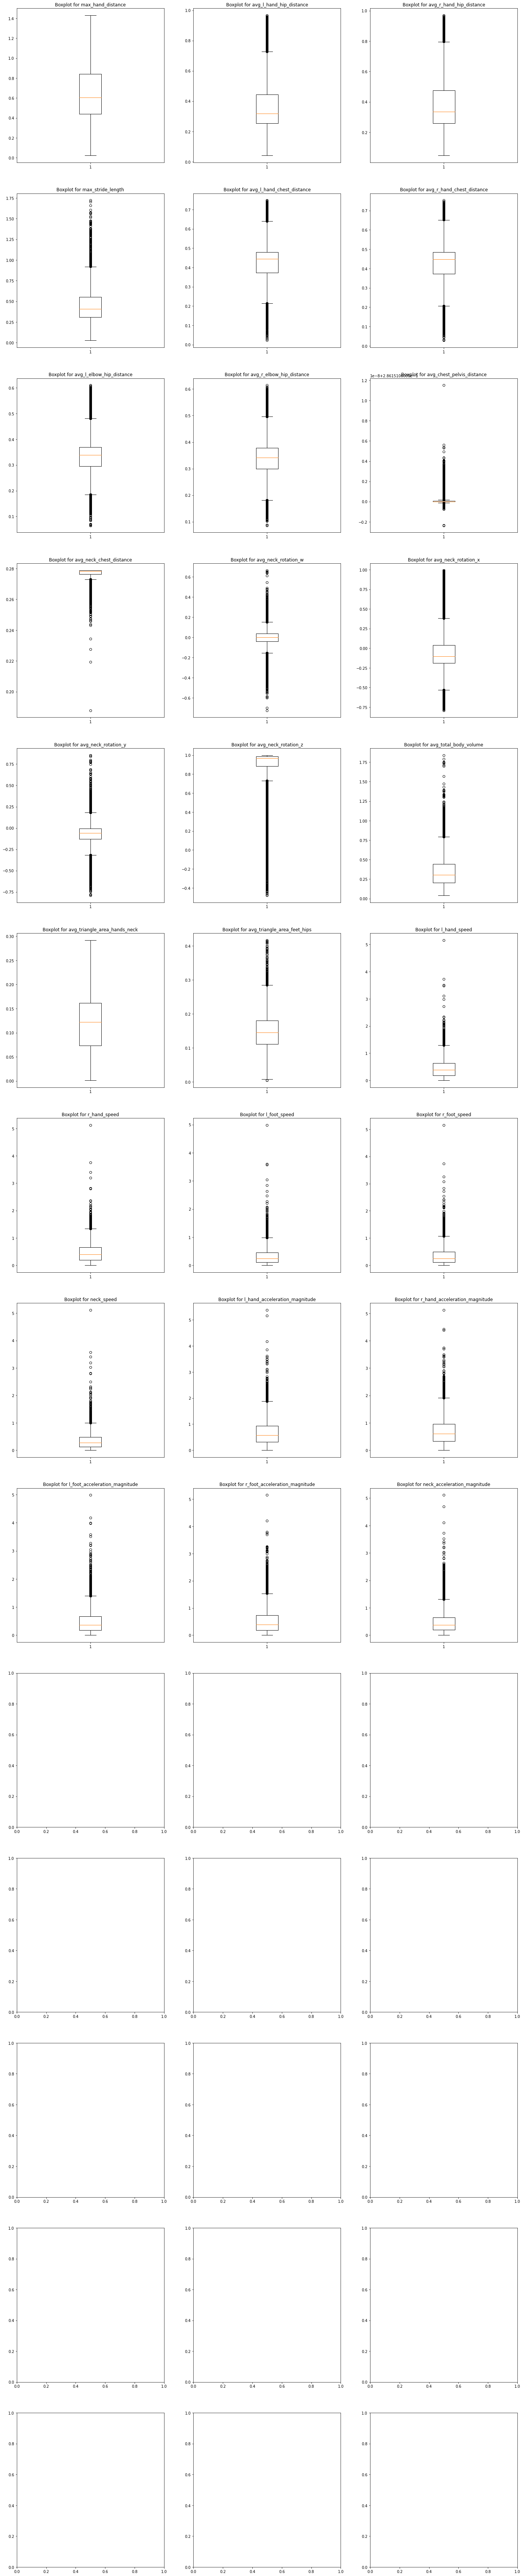

In [59]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [60]:
numeric_data = data

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,...,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000,12213.000000
mean,0.450770,0.351213,0.361734,0.247063,0.556490,0.552401,0.500947,0.487138,0.183829,0.977732,...,0.086166,0.090477,0.065474,0.067501,0.065691,0.126344,0.136926,0.096654,0.100364,0.091487
std,0.215258,0.172657,0.179097,0.117264,0.152431,0.150649,0.143788,0.146765,0.041716,0.039362,...,0.064359,0.066187,0.061348,0.063322,0.054241,0.091507,0.097719,0.083074,0.087442,0.074952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297750,0.229873,0.230560,0.166633,0.484589,0.476444,0.423100,0.404223,0.169134,0.973437,...,0.035809,0.038581,0.020803,0.020964,0.024499,0.058334,0.063897,0.035947,0.036538,0.037864
50%,0.414458,0.299002,0.311418,0.224696,0.583605,0.578452,0.502790,0.485332,0.170457,0.994708,...,0.074018,0.078877,0.047223,0.047579,0.053666,0.107020,0.117877,0.074062,0.076301,0.074292
75%,0.581451,0.434942,0.463357,0.311005,0.631440,0.630229,0.558954,0.553421,0.174326,0.998673,...,0.122100,0.127953,0.091225,0.095898,0.093151,0.174710,0.187901,0.133811,0.141295,0.125391
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


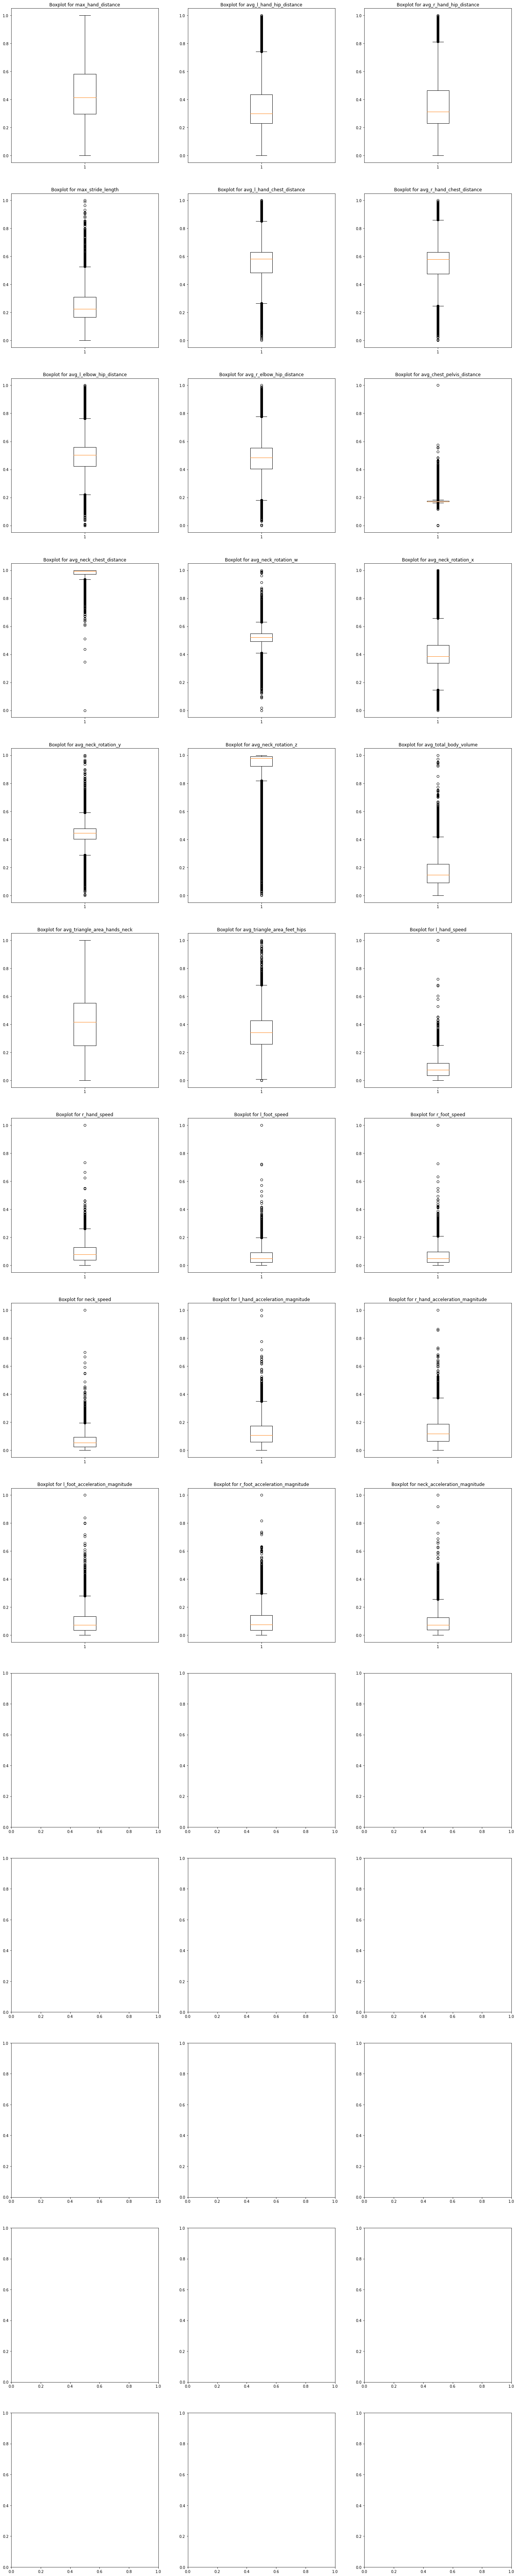

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.327745,0.244126,0.200626,0.271140,0.616132,0.586245,0.524938,0.470205,0.169207,0.998406,...,0.093643,0.085065,0.096376,0.069891,0.112594,0.089901,0.085065,0.096376,0.069891,0.112594
1,0.339631,0.310476,0.287487,0.251883,0.571067,0.568959,0.492911,0.468334,0.171418,0.998242,...,0.127357,0.124459,0.090007,0.042363,0.061187,0.185229,0.164096,0.180552,0.095242,0.165451
2,0.462141,0.451632,0.474756,0.276438,0.598374,0.536973,0.536176,0.439924,0.171289,0.995777,...,0.176560,0.105355,0.039255,0.044930,0.018337,0.290153,0.184568,0.127925,0.086707,0.076948
3,0.568018,0.313530,0.324585,0.279477,0.648730,0.615293,0.575191,0.514437,0.167639,0.996201,...,0.117774,0.125305,0.065127,0.079812,0.052384,0.276901,0.153203,0.096558,0.109866,0.061362
4,0.743083,0.244794,0.564353,0.287555,0.606938,0.750167,0.527419,0.696652,0.166462,0.997468,...,0.043634,0.086501,0.024836,0.022599,0.008628,0.141608,0.162079,0.085865,0.100389,0.058190


In [61]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [62]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/Fs_N_DANCE_WALK_KIN_1sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/Fs_N_DANCE_WALK_KIN_1sec.pkl') 

['datasets/scalers/Fs_N_DANCE_WALK_KIN_1sec.pkl']

In [47]:
data = pd.read_csv('datasets/N_DANCE_WALK_1sec.csv')
scaler = joblib.load(r'datasets/scalers/N_DANCE_WALK_1sec.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_foot_movement_jerk_z,r_foot_movement_jerk_x,r_foot_movement_jerk_y,r_foot_movement_jerk_z,neck_movement_jerk_x,neck_movement_jerk_y,neck_movement_jerk_z,EMOTION_P,EMOTION_A,EMOTION_D
0,0.940915,0.754152,0.767370,0.123694,0.901059,0.918658,0.880826,0.903785,0.170144,0.996807,...,0.501051,0.477455,0.465729,0.493831,0.321322,0.511517,0.481975,-0.35,0.7,-0.8
1,0.938178,0.755730,0.767383,0.123029,0.900861,0.918375,0.880569,0.903450,0.170215,0.995693,...,0.505473,0.479946,0.466197,0.498910,0.322780,0.511693,0.480723,-0.35,0.7,-0.8
2,0.937496,0.744931,0.758798,0.122978,0.897347,0.913864,0.876355,0.898115,0.170216,0.996877,...,0.502201,0.475640,0.465996,0.494891,0.321688,0.511460,0.481282,-0.35,0.7,-0.8
3,0.930797,0.734993,0.753712,0.122641,0.889120,0.911414,0.866487,0.895222,0.170070,0.997131,...,0.502908,0.482676,0.465654,0.496460,0.321476,0.511700,0.480821,-0.35,0.7,-0.8
4,0.928067,0.725395,0.749165,0.122056,0.885730,0.908917,0.862398,0.892264,0.170221,0.997796,...,0.502379,0.474292,0.466109,0.495057,0.322304,0.511416,0.482210,-0.35,0.7,-0.8


## Data Standardization

In [51]:
data = pd.read_csv('datasets/Fs_B_DANCE_WALK_0.5sec.csv')

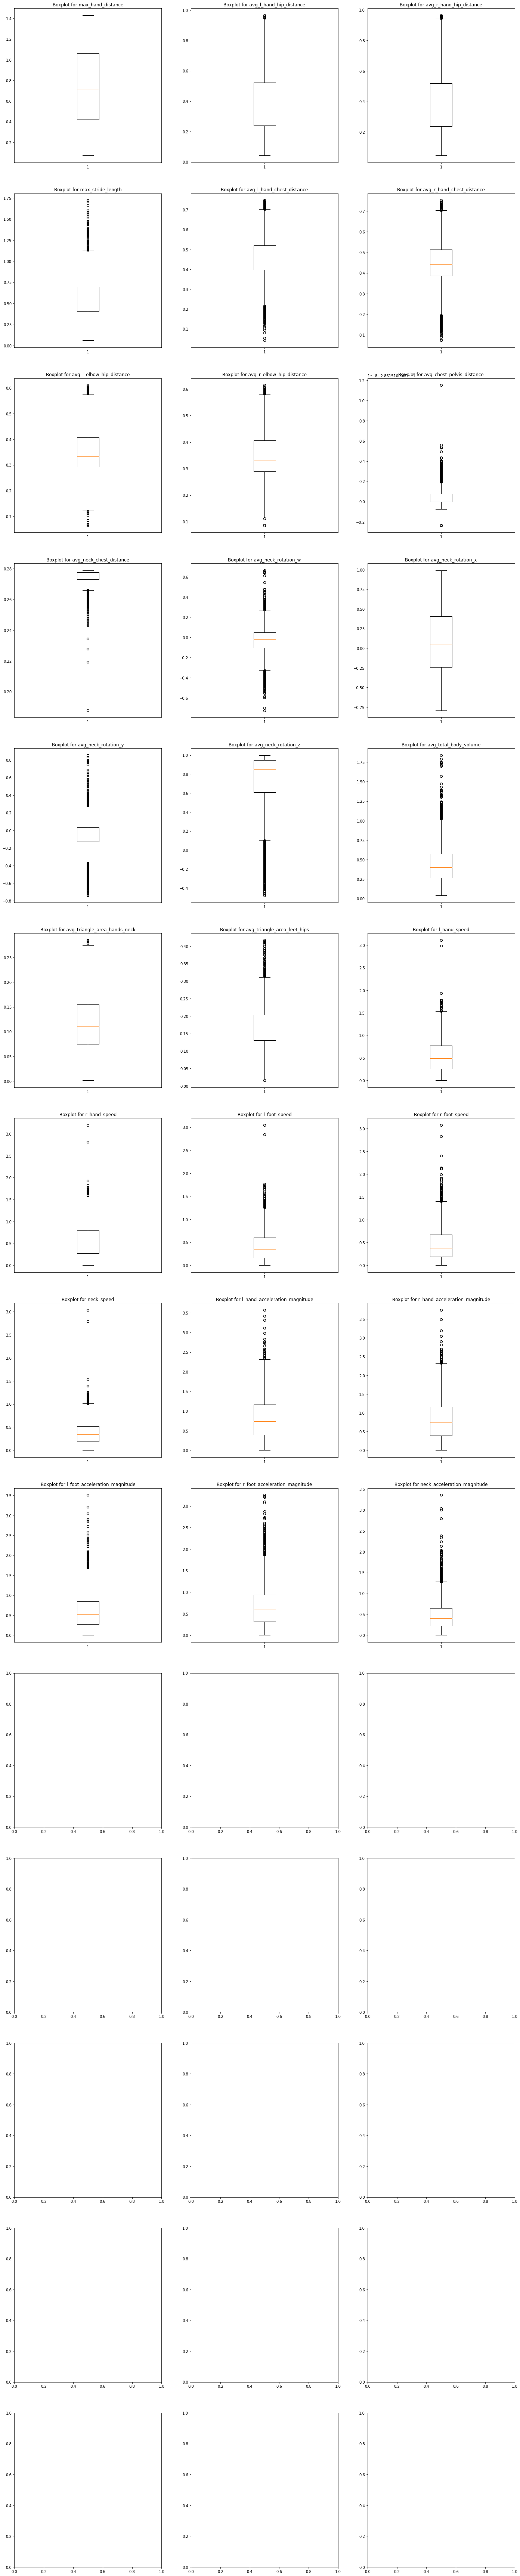

In [52]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [53]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,...,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03,9.170000e+03
mean,-9.918154e-17,-2.324567e-17,-1.270763e-16,7.128673e-17,-1.937139e-17,6.028378e-16,2.650007e-16,1.224272e-16,1.215824e-08,-1.295094e-14,...,7.438615e-17,6.818731e-17,5.578962e-17,9.298269e-17,1.208775e-16,-1.518717e-16,2.510533e-16,-1.115792e-16,-1.549712e-16,1.704683e-16
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,...,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-1.858350e+00,-1.784483e+00,-1.783779e+00,-2.272119e+00,-3.719018e+00,-3.321537e+00,-3.114636e+00,-2.915558e+00,-3.358453e+00,-1.947459e+01,...,-1.563283e+00,-1.585060e+00,-1.284017e+00,-1.309547e+00,-1.518982e+00,-1.514769e+00,-1.505132e+00,-1.404611e+00,-1.406005e+00,-1.393551e+00
25%,-8.955615e-01,-8.018640e-01,-8.048876e-01,-7.043196e-01,-5.321664e-01,-5.367478e-01,-6.702988e-01,-6.699574e-01,-5.902049e-01,-3.689900e-01,...,-8.078925e-01,-7.948335e-01,-7.820875e-01,-7.814353e-01,-7.561917e-01,-7.928952e-01,-7.974298e-01,-7.555028e-01,-7.530539e-01,-7.297667e-01
50%,-1.046731e-01,-2.414056e-01,-2.264557e-01,-6.337359e-02,-1.333139e-01,-5.833265e-02,-2.309628e-01,-2.084978e-01,-4.904555e-01,2.752898e-01,...,-1.315669e-01,-1.223354e-01,-2.280326e-01,-2.280003e-01,-1.383344e-01,-1.552898e-01,-1.367066e-01,-2.039742e-01,-1.823409e-01,-2.130269e-01
75%,8.608244e-01,6.186150e-01,6.222262e-01,5.799994e-01,5.572845e-01,5.900267e-01,5.539797e-01,6.255933e-01,3.305552e-01,6.837015e-01,...,6.770937e-01,6.823232e-01,5.682407e-01,5.967748e-01,5.895549e-01,6.388378e-01,6.147317e-01,5.534596e-01,5.247094e-01,5.059275e-01
max,1.879513e+00,2.833020e+00,2.877285e+00,5.185927e+00,2.588696e+00,2.702878e+00,2.734277e+00,2.920618e+00,1.299007e+01,9.633795e-01,...,7.508773e+00,7.558379e+00,8.122827e+00,7.395602e+00,1.083210e+01,5.102400e+00,5.340058e+00,6.753506e+00,5.304789e+00,8.447652e+00


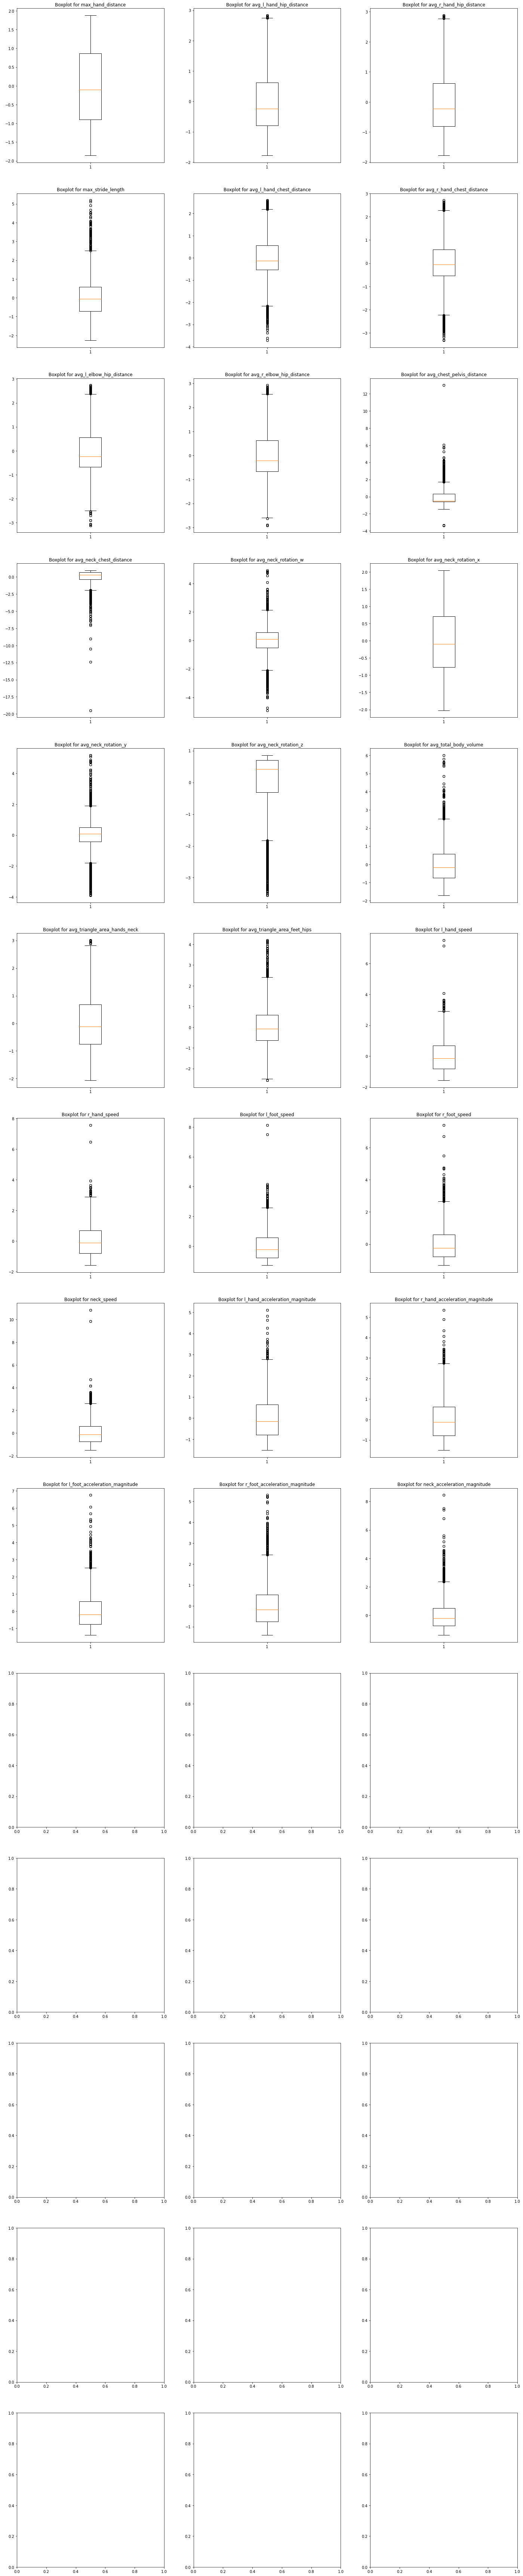

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,1.658663,1.697815,1.792981,-1.349606,1.964606,2.212842,2.037240,2.359089,-0.576846,0.898116,...,-1.537849,-1.578632,-1.267663,-1.293086,-1.515437,-1.500800,-1.493993,-1.372928,-1.379603,-1.379595
1,1.648430,1.705101,1.793043,-1.354566,1.963355,2.211137,2.035734,2.357134,-0.575683,0.875362,...,-1.549240,-1.562888,-1.271389,-1.280533,-1.509810,-1.494304,-1.494779,-1.380296,-1.380710,-1.385837
2,1.645881,1.655236,1.753026,-1.354941,1.941191,2.183956,2.011088,2.326000,-0.575669,0.899546,...,-1.513327,-1.569046,-1.270879,-1.269427,-1.510401,-1.492893,-1.486174,-1.389141,-1.357596,-1.392138
3,1.620843,1.609350,1.729319,-1.357454,1.889295,2.169198,1.953369,2.309113,-0.578064,0.904747,...,-1.488937,-1.537139,-1.273723,-1.285603,-1.510779,-1.475462,-1.485922,-1.393925,-1.361703,-1.381538
4,1.610638,1.565030,1.708125,-1.361817,1.867915,2.154154,1.929453,2.291849,-0.575584,0.918327,...,-1.523770,-1.572657,-1.263619,-1.255613,-1.503000,-1.488811,-1.472528,-1.380124,-1.349838,-1.378070


In [54]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [55]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/Fs_B_S_DANCE_WALK_0.5sec.csv', index = False)

joblib.dump(transf, r'datasets/scalers/standardizers/Fs_B_S_DANCE_WALK_0.5sec.pkl') 

['datasets/scalers/standardizers/Fs_B_S_DANCE_WALK_0.5sec.pkl']

In [56]:
data = pd.read_csv('datasets/Fs_B_S_DANCE_WALK_0.5sec.csv')
scaler = joblib.load(r'datasets/scalers/standardizers/Fs_B_S_DANCE_WALK_0.5sec.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,1.658663,1.697815,1.792981,-1.349606,1.964606,2.212842,2.037240,2.359089,-0.576846,0.898116,...,-1.293086,-1.515437,-1.500800,-1.493993,-1.372928,-1.379603,-1.379595,-0.35,0.7,-0.8
1,1.648430,1.705101,1.793043,-1.354566,1.963355,2.211137,2.035734,2.357134,-0.575683,0.875362,...,-1.280533,-1.509810,-1.494304,-1.494779,-1.380296,-1.380710,-1.385837,-0.35,0.7,-0.8
2,1.645881,1.655236,1.753026,-1.354941,1.941191,2.183956,2.011088,2.326000,-0.575669,0.899546,...,-1.269427,-1.510401,-1.492893,-1.486174,-1.389141,-1.357596,-1.392138,-0.35,0.7,-0.8
3,1.620843,1.609350,1.729319,-1.357454,1.889295,2.169198,1.953369,2.309113,-0.578064,0.904747,...,-1.285603,-1.510779,-1.475462,-1.485922,-1.393925,-1.361703,-1.381538,-0.35,0.7,-0.8
4,1.610638,1.565030,1.708125,-1.361817,1.867915,2.154154,1.929453,2.291849,-0.575584,0.918327,...,-1.255613,-1.503000,-1.488811,-1.472528,-1.380124,-1.349838,-1.378070,-0.35,0.7,-0.8
